<div style="width:100%"><a href="https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116"><img src="https://python.guillod.org/book/banner1.png"/></a></div>

This file reflects the statements of the exercises of a chapter of the book *[Python Programming for Mathematics](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116)*.
All statements can be downloaded in [Jupyter Notebook](https://python.guillod.org/book/) format or executed directly online on [GESIS](https://notebooks.gesis.org/binder/v2/gh/guillod/python-book/HEAD).
The answers are available in the book (ISBN [9781032910116](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781032910116)) and ebook (ISBN [9781003565451](https://www.routledge.com/Python-Programming-for-Mathematics/Guillod/p/book/9781003565451)) published by Chapman & Hall/CRC Press in the Python Series.
This file reflects the exercises as published in this book and differs somewhat from the exercises presented on the page [python.guillod.org](https://python.guillod.org/).

# 10 Probability and statistics

<div id="ch:proba-stats"></div>

In a first step, the statistics of the proportion of numbers beginning with a certain digit will be studied. Then in a second step, important probabilistic models will be introduced and simulated, such as random walks, illustrations of the central limit theorem, or percolation.

**Concepts abordés:**

* statistics and probability

* random harmonic series

* random walk

* central limit theorem

* random vectors

* percolation

* phase transition

* histograms

* optimization by compilation

# Exercise 10.1: Harmonic series of random sign

The goal of this exercise is to simulate the convergence of a harmonic series whose sign is drawn randomly. More precisely, if $(X_i)_{i\in\mathbb{N}}$ is a sequence of independent random variables worth $-1$ or $1$ with probability $\frac{1}{2}$, then we define the partial sum:

$$
W_0 = 0 \,, \qquad\qquad W_n = \sum_{i=1}^n \frac{X_i}{i} \,,
$$

and the question is to determine if the sequence $(W_n)_{n\in\mathbb{N}}$ converges and if so toward what.

**a)**
Write a function `sign()` that simulates the random variable $X_i$.

**b)**
Write a function `simulate(n)` that returns a realization of $(W_0,W_1,\dots,W_n)$.

**c)**
Plot the function $n \mapsto W_n$ for different realizations, for example, for $0\leq n\leq 1 000$ and make a conjecture about the convergence of the sequence $(W_n)_{n\in\mathbb{N}}$.

**d)**
<font color="red">!</font>
Determine the histogram of $W_{1 000}$ for $10^4$ or $10^5$ realizations to get an idea of the law of the limiting random variable.

# Exercise 10.2: Gambler's ruin

The goal is to simulate the evolution of the amount of money of a gambler playing heads or tails. At each toss, the player wins one euro if it is heads and loses one if it is tails. The probability of getting tails is noted $p$, that of getting heads $q$. In particular, $p=q=\frac{1}{2}$ if the coin is balanced.

Mathematically, the sum $S_i$ owned by the player at time $i$ is given by a random walk:

$$
S_{i}=\begin{cases}
0\,, & \text{if}\:S_{i-1}=0\,,\\ 
S_{i-1}+X_{i}\,, & \text{if}\:S_{i-1}\geq1\,,
\end{cases}
$$

where $(X_i)_ {i}$ are independent random variables of law $\mathbb{P}(X_i=1) = p$ and $\mathbb{P}(X_i=-1) = q$.

**a)**
Write a function `simulate(p,k,N)` that generates a realization of length $N$ of the process from $S_0=k$, *i.e.*, returns $(S_0,S_1,S_2,\dots,S_N)$. Represent graphically several realizations.

**b)**
Simulate a player who, starting with a sum $k$, plays until he loses everything or has the amount $n \geq k$.

**c)**
If $T$ is the time at which the game stops, *i.e.*, when $S_T = 0$ or $S_T = n$, recover by simulation the theoretical results on the average time:

$$
\mathbb{E}(T)=\begin{cases}
k(n-k)\,, & \text{if}\:p=q\,,\\ 
\dfrac{n}{p-q}\dfrac{1-\rho^{k}}{1-\rho^{n}}-\dfrac{k}{p-q}\,, & \text{if}\:p\neq q\,,
\end{cases}
$$

and the place of exit:

$$
\mathbb{P}(S_{T}=0)=\begin{cases}
\dfrac{n-k}{n}\,, & \text{if}\:p=q\,,\\[4pt] 
\dfrac{\rho^{k}-\rho^{n}}{1-\rho^{n}}\,, & \text{if}\:p\neq q\,,
\end{cases}
$$

where $\rho = q/p$. For this, we can plot these quantities as a function of $p$ or just consider the case $p=q=\frac{1}{2}$.

# Exercise 10.3: Pólya urn

An urn initially contains (at $t=0$) $r_0$ red balls and $b_0$ white balls. At each time, we pick a ball uniformly at random from the urn. This ball is then returned to the urn and a ball of the same color is added. Such a system is called a *Pólya urn*.
The purpose of this exercise is to study the behavior of the fraction of red balls in the urn, *i.e.*, the number of red balls out of the total number.
We will call $r_n$ and $b_n$, respectively, the number of red and white balls in the urn at time $n$.

**a)**
Write a function `density` taking as argument a tuple representing the number of red and white balls in an urn, and which returns the density of red balls.

We want to recursively construct the distribution of the number of red balls at time $n$, *i.e.*, the list of probabilities that the number of red balls is equal to a given integer $k$ (which will be the index of the list). This is done by writing two functions: `next_dist_red`, which takes as argument the distribution at time $n$ and returns the one at time $n+1$, which is thus the function that does all the work, and `dist_red`, which is the wrapper function, taking as argument $r_0$, $b_0$, and time $n$ and returning the distribution at time $n$ by a recursive call.
We will use the following useful facts (make a small drawing):
* The distribution passed as an argument to `next_dist_red` is a list `r`, and `r[k]` represents the probability of having `k` red balls in the urn at time $n$. The indices for `r` vary from 0 to the total number `s` of balls at time $n$.

* At time $n+1$, to have $k$ red balls, we need:

  * either having had $k$ red balls at the previous time and not having drawn a red ball;

  * or having had $k-1$ red balls at the previous time and having drawn a red ball.

* If $n=0$, the result of `dist_red` is completely deterministic and the coefficients of the list are only 0 and 1, depending on $r_0$ and $b_0$.

**b)**
Write the functions `next_dist_red` and `dist_red` using the directions provided. Look at the result of `dist_red(0,1,n)` and `dist_red(1,1,n)` for different values of `n` $(1,2,5,10,20,\dots)$ and comment.

Rather than theoretically computing for each $n$ the sequence of theoretical probabilities, we will do statistics on a large number of Pólya urn realizations, after a large number of steps. For this, we need a function to evolve a Pólya urn.

**c)**
Define a function `polya_step(r,b)` which, given the composition of an urn passed as two parameters `r` and `b`, returns the (random) evolution after one step of the composition of the urn as a tuple. Also define a function `polya(r0,b0,N)` taking as arguments $r_0$, $b_0$ and $N$ as parameters and returning the (random) composition of a Pólya urn after $N$ steps, also as a tuple.

**d)**
Write a function `data_rdens_polya(r0,b0,N,nbexp)` that returns a list of length `nbexp` containing the densities of `nbexp` realizations of Pólya urns at time `N` initialized with `r0` red balls and `b0` white balls.

**e)**
Store the result of `data_rdens_polya(2,3,1000,10_000)` in a variable and draw a histogram to see the distribution of densities. Be careful, we want the heights of the bars to be normalized so that their surface represents the proportion of points, and not so that they give the number of points per bin.

**Hint.**
A good rule of thumb is to choose the number of bins for a histogram of the order of the square root of the number of points. See the documentation of the `hist` function of Matplotlib.

# Exercise 10.4: Central limit theorem

The central limit theorem (also known as the central limit theorem, the central limit theorem or the central limit theorem) establishes the convergence of the sum of a sequence of random variables toward the normal distribution. Intuitively, this result states that a sum of identical and independent random variables tends (under certain conditions) toward a Gaussian random variable. Here's how it works:

**Theorem:**
Let $(X_n)$ be a sequence of independent real random variables of the same distribution with expectation $\mu$ and standard deviation $\sigma \ne 0$.
Let $(\bar{X}_n)$ be the sequence defined by:

$$
\bar{X}_n = \frac{1}{n} \sum_{k=1}^n X_k \,.
$$

For $n$ large enough, the distribution of $\bar{X}_n$ can be approximated by the normal distribution $\mathcal{N}(\mu, \frac{\sigma^2}{n})$.

The aim of this exercise is to check whether this theorem is valid for different laws of probability:

* **Poisson distribution**: discrete distribution on $\mathbb{N}$, of parameter $\lambda$, defined by:

$$
\mathbb{P}(X = k) = \exp(-\lambda) \frac{\lambda^k}{k!}\,, \quad \forall k \in \mathbb{N} \,.
$$

* **Normal distribution**: continuous distribution on $\mathbb{R}$, of parameters $m$ and $\sigma$, defined by density:

$$
\frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( - \frac{(x-m)^2}{2\sigma^2} \right)\,, \quad \forall x \in \mathbb{R} \,.
$$

* **Cauchy distribution**: continuous distribution on $\mathbb{R}$, of parameters $a$ and $\gamma$, defined by density:

$$
\frac{1}{\pi\gamma\left(1 + \left(\frac{x-a}{\gamma}\right)^2\right)}\,, \quad \forall x \in \mathbb{R} \,.
$$

**a)**
Define a function `normal_density(x, mu var)` taking as an argument :
* `x` (array): an array of floating-point numbers;

* `mu` (floating number): average $\mu$;

* `var` (strictly positive floating number): variance $\sigma^2$;

and which returns the density of the normal distribution evaluated for each number $x$ in `x`:

$$
\mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( - \frac{(x-\mu)^2}{2\sigma^2} \right) \,.
$$

**b)**
Look at the documentation for the [`numpy.random.poisson`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.poisson.html) function and generate 10 random values according to a Poisson distribution with parameter $\lambda = 2$.

**c)**
Write a function `samples_poisson(lam, N, M)` which takes as arguments:
* `lam` (strictly positive real): parameter $\lambda$ for the Poisson distribution;

* `N` (strictly positive integer): number of experiments;

* `M` (strictly positive integer): number of random variables generated for each experiment;

and which generates `N` experiments with `M` random variables generated per experiment, and returns:
* the average value (floating number) over the `N * M` random variables generated;

* the standard deviation (floating number) on the `N * M` random variables generated;

* a numpy vector of size `N` where each element is the mean of the random variables in an experiment.

For the values `lam=2` and `N=10_000`, run `samples_poisson(lam, N, M)` for $M \in \{10, 100, 1 000\}$ and save the results in variables.

**d)**
For each value of `M`, display the distribution of the numpy vector containing the means of each experiment, as well as the distribution of the expected normal distribution if the central limit theorem is verified. You can use Matplotlib `hist` function to display the histogram of a table, with the `bins=50` parameter to set the number of columns and `density=True` to display a probability distribution. Use the empirical means and standard deviations returned by the `samples_poisson` function for normal distribution parameters.
Choose relevant values for the x-axis boundary values. Make a hypothesis on the validity of the central limit theorem for the Poisson distribution.

**e)**
Repeat questions **c)** and **d)** for the normal distribution. Using the function [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html), generate averages for `loc=2`, `scale=1`, `N=10_000`, and $M \in \{10, 100, 1 000\}$.
Plot the histograms and make a hypothesis about the validity of the central limit theorem for the normal distribution.

**f)**
Repeat questions **c)** and **d)** for the Cauchy distribution with $a=0$ and $\gamma=1$. To do this, use the function [`numpy.random.standard_cauchy`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_cauchy.html). Use `bins=np.arange(-10, 10.1, 0.1)` and make an assumption about the validity of the central limit theorem for the Cauchy distribution.

# Exercise 10.5: Random generation of unit vectors

The aim of this exercise is to find an efficient method for randomly generating unit vectors in $\mathbb{R}^n$ according to a uniform distribution.
We will start with the case $n = 2$, where a real vector can be represented by a complex number.

**a)**
Consider the following strategy for randomly generating a unit vector in $\mathbb{R}^2$:

1. Generate $x$ randomly according to the uniform distribution on $[-1, 1]$;

2. Generate $y$ randomly according to the uniform distribution on $[-1, 1]$;

3. Return the unit complex $z = \frac{x}{\sqrt{x^2 + y^2}} + \frac{y}{\sqrt{x^2 + y^2}}i$.

Write a function `generate_complex` which takes as argument a positive integer $N$ and returns a NumPy array of size $N$, where each element is a complex generated by the above strategy.

**Hint.**
It is much more efficient to generate $N$ random variables directly using the `size` argument of the function [`numpy.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) than to generate them one by one with a `for` loop.

**b)**
For $n=2$, one way to check whether the distribution of vectors is uniform is to look at the distribution of angles/arguments of the complex numbers (*i.e.*, $\arg{z}$): this should be uniform.
Use the `generate_complex` function with $N = 10^6$ and display the distribution of angles/arguments. Does the strategy described in the previous question generate unit vectors uniformly?

**Hint.**
You can use the function [`numpy.angle`](https://numpy.org/doc/stable/reference/generated/numpy.angle.html).

**c)**
The following modification to the previous strategy is proposed:

1. Generate $x$ randomly according to the uniform distribution on $[-1, 1]$;

2. Generate $y$ randomly according to the uniform distribution on $[-1, 1]$;

3. If $x^2 + y^2 \leq 1$, return the unit complex $z = \frac{x}{\sqrt{x^2 + y^2}} + \frac{y}{\sqrt{x^2 + y^2}}i$ (otherwise return nothing at all).

Write a function `generate_complex_monte_carlo` which takes as argument a positive integer $N$ corresponding to the number of candidate vectors and returns a NumPy array of size $n \leq N$, where each element is a complex generated by the above strategy.
**Warning:** $n$ is random and therefore cannot be determined in advance.

Repeat the previous question and display the angle/argument distribution of the complexes generated by this strategy.
Does this strategy generate unit vectors uniformly?

**d)**
We now ask how many candidate complexes must be generated on average to accept $n$ of them, which is equivalent to determining how many complexes are accepted on average from the $N$ candidates.
The law of large numbers means that the ratio converges to the probability that a candidate vector will be accepted.
This probability is equal to the ratio of the inclusion area $\pi$ (the unit circle) to the total area $4$ (the square $[-1, 1]^2$), *i.e.*, $\frac{\pi}{4}$.
Compare the ratio $\frac{n}{N}$ to $\frac{\pi}{4}$.

**e)**
We now consider the general case $n \geq 2$. The strategy considered is the same as in question **c)**:

1. Generate a vector $\boldsymbol{x}=(x_1, \ldots, x_n)$, where each $x_k$ is randomly and independently generated according to the uniform distribution on $[-1, 1]$;

2. If $\Vert \boldsymbol{x} \Vert_2 \leq 1$, return the unit vector $\frac{\boldsymbol{x}}{\Vert \boldsymbol{x} \Vert_2}$.

The volume of the unit ball in $\mathbb{R}^n$ is given by:

$$
V_n = \frac{\pi^{n/2}}{\Gamma(\frac{n}{2} + 1)}
$$

and the volume of the cube $[-1, 1]^n$ is $2^n$. Plot the probability of a vector being accepted in step 2 of this strategy for $n \in \{2, \ldots, 20\}$.

Do you think this strategy is effective for large $n$ values?

**Hint.**
We can use [`scipy.special.gamma`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gamma.html) for the $\Gamma$ function
and the function [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) of Matplotlib to graphically display the values of a sequence with an adapted [scale](https://matplotlib.org/stable/gallery/scales/scales.html).

**f)**
The following strategy can be shown to generate random vectors on $\mathbb{R}^n$:

1. Generate a vector $\boldsymbol{x}=(x_1, \ldots, x_n)$, where each $x_k$ is generated randomly and independently according to the reduced centered normal distribution: $x_k \sim \mathcal{N}(0, 1)$;

2. Return the unit vector $\frac{\boldsymbol{x}}{\Vert \boldsymbol{x} \Vert_2}$.

Verify for $n=2$ that this strategy does indeed randomly generate unit vectors according to a uniform distribution by displaying the angle distribution (representing the vectors as complex numbers) for $N = 10^6$ vectors.

**Hint.**
You can use the function [`numpy.random.standard_normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.standard_normal.html).

# Exercise 10.6: <font color="red">!!</font> Percolation

The goal is to study a percolation model in a porous medium. The medium is modeled by a random matrix of Booleans that determines which sites can be invaded by water and which are impermeable. A matrix percolates if there is a water path from the top row to the bottom row.
In the following examples, the entries of a matrix that can be percolated by water are colored and the entries that are actually filled with water are in blue. The first matrix does not percolate while the second does:

<center>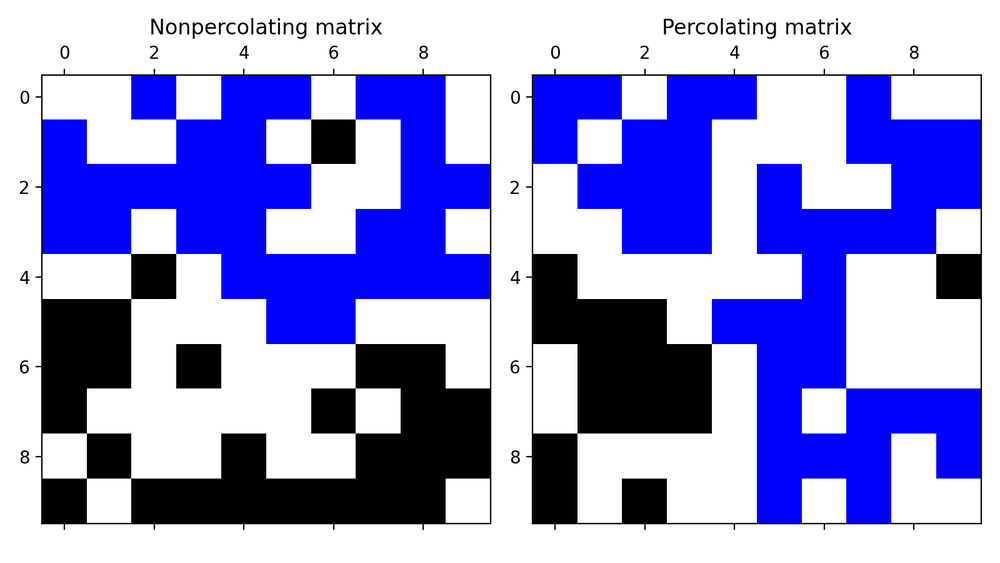</center>

**a)**
Write a function `generate(n,p)` that generates a matrix of Booleans of size $n \times n$ such that each entry has probability $p$ of being right and $1-p$ of being wrong.

**Hint.**
The `random.binomial` function of NumPy can be useful.

**b)**
Define a function `fill(isopen)` that for a given Boolean matrix returns another Boolean matrix with the entries invaded by water.

**Hint.**
Define a Boolean matrix `isfull` to store whether an input is filled with water or not, and then define a recursive function `flow(isopen, isfull, i, j)` to invade all possible inputs from $(i,j)$.

**c)**
Using Matplotlib, represent the filling of different randomly generated matrices.

**d)**
Define a function `percolate(isopen)` to determine whether a Boolean matrix is percolating or not.

**e)**
<font color="red">!!</font> Calculate the time needed to determine if a matrix of size $50 \times $50 with $p=0.9$ is percolating or not. Read the documentation of the Numba module to reduce the calculation time by compiling one of the functions: <https://numba.pydata.org/>.

**Hint.**
The function that is most used is the recursive function, so it is the one that should be optimized when compiling it.

**f)**
By doing statistics, determine the probability that a Boolean random matrix of size $n \times n$ with probability $p$ will percolate. Study this probability as a function of $p$ and $n$.

**Hint.**
Plot this percolation probability as a function of $p$ for different values of $n$.

**Answer.**
In the limit of $n$ very large, a matrix almost surely percolates if $p>0.592746$ and almost never otherwise.

**g)**
<font color="red">!!!</font> The statistics performed in the previous point are a typical example of calculations that can be easily executed in parallel, because each case is independent of the others. Parallelize the previous algorithm in such a way as to use all the cores of your processor, for example, with the help of the module [`mpi4py`](https://mpi4py.readthedocs.io/).

**Hint.**
Using Jupyter Lab to do parallel computing is quite complex to implement, it is better to use the command line to run a script in parallel, for example, for four cores: `mpirun -n 4 script.py`. Note that [Open MPI](https://www.open-mpi.org/) or [MPICH](https://www.mpich.org/) must be installed on the computer.